<a href="https://colab.research.google.com/github/ravi-gopalan/lstm_analyses/blob/master/lstm_prediction_WDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=9c9b5cdbb2e17568709ed517413a10c5e3b5badad9677d903993d57165c0a496
  Stored in directory: /root/.cache/pip/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
# Importing the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
# Import yfinance
import yfinance as yf 

In [4]:
!git clone -l -s git://github.com/ravi-gopalan/lstm_analyses.git cloned-repository

Cloning into 'cloned-repository'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 505.63 KiB | 684.00 KiB/s, done.
Resolving deltas: 100% (3/3), done.


In [5]:
!ls

cloned-repository  sample_data


[*********************100%***********************]  1 of 1 downloaded


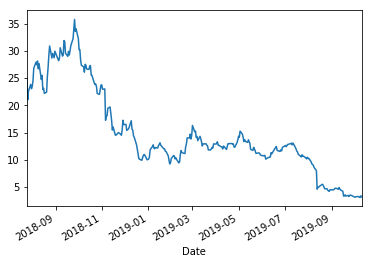

In [6]:
# Get the data for the stock BE by specifying the stock ticker, start date, and end date
df_be = yf.download('BE','2016-01-01','2019-10-13')
 
# Plot the close prices
df_be.Close.plot()
plt.show()

[*********************100%***********************]  1 of 1 downloaded


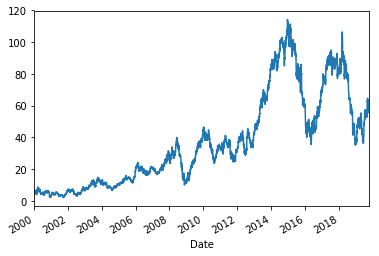

In [10]:
# Get the data for the stock BE by specifying the stock ticker, start date, and end date
df_wdc = yf.download('WDC','2000-01-01','2019-10-13')
 
# Plot the close prices
df_wdc.Close.plot()
plt.show()

In [11]:
type(df_wdc)

pandas.core.frame.DataFrame

In [12]:
df_wdc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4976 entries, 2000-01-03 to 2019-10-11
Data columns (total 6 columns):
Open         4976 non-null float64
High         4976 non-null float64
Low          4976 non-null float64
Close        4976 non-null float64
Adj Close    4976 non-null float64
Volume       4976 non-null int64
dtypes: float64(5), int64(1)
memory usage: 272.1 KB


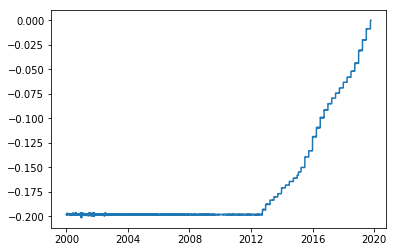

In [13]:
plt.plot((df_wdc['Adj Close']-df_wdc['Close'])/df_wdc['Close'])

In [14]:
df_wdc.head()
df_wdc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4.25,4.25,3.94,3.94,3.16,2461900
2000-01-04,3.94,5.00,3.88,4.69,3.76,7660300
2000-01-05,4.75,4.75,4.12,4.38,3.51,3944600
2000-01-06,4.50,4.69,4.31,4.56,3.66,2468400
2000-01-07,4.62,5.62,4.62,5.62,4.51,9783000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-07,58.29,58.75,57.93,57.99,57.99,2457300
2019-10-08,57.10,57.30,55.40,55.52,55.52,4404300
2019-10-09,56.27,56.97,55.93,56.53,56.53,2242800
2019-10-10,56.40,57.82,56.13,57.34,57.34,2361600
2019-10-11,58.54,59.28,58.01,58.35,58.35,2617800


In [15]:
df_wdc.drop(columns=['Adj Close'],inplace=True)
df_wdc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,4.25,4.25,3.94,3.94,2461900
2000-01-04,3.94,5.00,3.88,4.69,7660300
2000-01-05,4.75,4.75,4.12,4.38,3944600
2000-01-06,4.50,4.69,4.31,4.56,2468400
2000-01-07,4.62,5.62,4.62,5.62,9783000


In [17]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
roll_mean_wdc = df_wdc['Open'].rolling(window).mean()
roll_std_wdc = df_wdc['Open'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df_wdc['rolling_mean'] = roll_mean_wdc
df_wdc['bollinger_high'] = roll_mean_wdc + (roll_std_wdc * no_of_std)
df_wdc['bollinger_low'] = roll_mean_wdc - (roll_std_wdc * no_of_std)
df_wdc.head()
df_wdc.tail()

,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,4.25,4.25,3.94,3.94,2461900,NaN,NaN,NaN
2000-01-04,3.94,5.00,3.88,4.69,7660300,NaN,NaN,NaN
2000-01-05,4.75,4.75,4.12,4.38,3944600,NaN,NaN,NaN
2000-01-06,4.50,4.69,4.31,4.56,2468400,NaN,NaN,NaN
2000-01-07,4.62,5.62,4.62,5.62,9783000,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-07,58.29,58.75,57.93,57.99,2457300,61.424286,66.067369,56.781202
2019-10-08,57.10,57.30,55.40,55.52,4404300,61.185238,66.181367,56.189109
2019-10-09,56.27,56.97,55.93,56.53,2242800,60.894762,66.294586,55.494937
2019-10-10,56.40,57.82,56.13,57.34,2361600,60.584762,66.240098,54.929426
2019-10-11,58.54,59.28,58.01,58.35,2617800,60.300000,65.720446,54.879554


In [24]:
df_wdc.iloc[4778,:]

Open              3.804000e+01
High              3.809000e+01
Low               3.582000e+01
Close             3.697000e+01
Volume            6.960500e+06
rolling_mean      4.046000e+01
bollinger_high    4.803532e+01
bollinger_low     3.288468e+01
Name: 2018-12-31 00:00:00, dtype: float64

In [31]:
4778-2262

2516

In [30]:
df_wdc.iloc[2262,:]

Open              1.123000e+01
High              1.158000e+01
Low               1.108000e+01
Close             1.145000e+01
Volume            2.584800e+06
rolling_mean      1.193333e+01
bollinger_high    1.315370e+01
bollinger_low     1.071297e+01
Name: 2008-12-31 00:00:00, dtype: float64

In [43]:
df_wdc.iloc[4778,:]

Open              3.804000e+01
High              3.809000e+01
Low               3.582000e+01
Close             3.697000e+01
Volume            6.960500e+06
rolling_mean      4.046000e+01
bollinger_high    4.803532e+01
bollinger_low     3.288468e+01
Name: 2018-12-31 00:00:00, dtype: float64

In [33]:
df_wdc.iloc[4882,:]

Open              3.869000e+01
High              3.967000e+01
Low               3.717000e+01
Close             3.722000e+01
Volume            7.121300e+06
rolling_mean      4.424810e+01
bollinger_high    5.118006e+01
bollinger_low     3.731613e+01
Name: 2019-05-31 00:00:00, dtype: float64

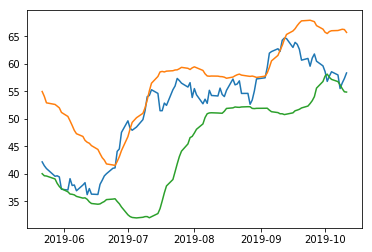

In [34]:
sns.lineplot(data=df_wdc['Close'][-100:])
sns.lineplot(data=df_wdc['bollinger_high'][-100:])
sns.lineplot(data=df_wdc['bollinger_low'][-100:])

In [36]:
df_wdc['Close'].values

array([ 3.94,  4.69,  4.38, ..., 56.53, 57.34, 58.35])

In [37]:
close_array = df_wdc.values
close_array.shape
close_array[:3]

(4976, 8)

array([[4.2500e+00, 4.2500e+00, 3.9400e+00, 3.9400e+00, 2.4619e+06,
               nan,        nan,        nan],
       [3.9400e+00, 5.0000e+00, 3.8800e+00, 4.6900e+00, 7.6603e+06,
               nan,        nan,        nan],
       [4.7500e+00, 4.7500e+00, 4.1200e+00, 4.3800e+00, 3.9446e+06,
               nan,        nan,        nan]])

In [40]:
close_array[2263:,3].shape

(2713,)

In [45]:
train_array = close_array[2263:4778,3]
train_array.shape

(2515,)

In [48]:
valid_array = close_array[4778:4882,3]
valid_array.shape

(104,)

In [49]:
test_array = close_array[4883:,3]
test_array.shape

(93,)

In [0]:
train_array[0]

array([2.5625e+00, 2.5625e+00, 2.3125e+00, 2.3125e+00, 7.0300e+05])

In [74]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler


sc_wdc = MinMaxScaler((0, 1))

scale1 = sc_wdc.fit_transform(train_array.reshape(-1, 1))

scale1.shape

(2515, 1)

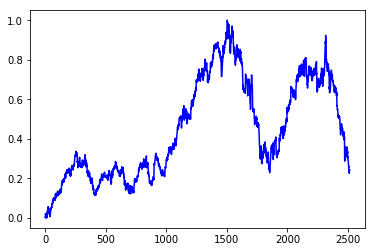

In [54]:
plt.plot(scale1,color='b',label='close')


In [0]:
# Creating a data structure with 30 timesteps and 1 output
timesteps=30
X_train = []
y_train = []
for i in range(timesteps, train_array.shape[0]):
    X_train.append(scale1[i-timesteps:i, 0])
    y_train.append(scale1[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [57]:
X_train.shape
y_train.shape

(2485, 30, 1)

(2485,)

In [58]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [59]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(rate=0.2))

# Adding the output layer
regressor.add(Dense(units = 1))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [60]:
# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [62]:
epoch_trials = [10]
batch_size_trials = [228]

reg_models = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor.fit(X_train, y_train, epochs = n_epochs, batch_size = b_size)
    reg_models.append(regressor)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





2485/2485 [==============================] - 9s 4ms/step - loss: 0.1591
Epoch 2/10
2485/2485 [==============================] - 3s 1ms/step - loss: 0.0062
Epoch 3/10
2485/2485 [==============================] - 3s 1ms/step - loss: 0.0134
Epoch 4/10
2485/2485 [==============================] - 3s 1ms/step - loss: 0.0113
Epoch 5/10
2485/2485 [==============================] - 3s 1ms/step - loss: 0.0187
Epoch 6/10
2485/2485 [==============================] - 3s 1ms/step - loss: 0.0172
Epoch 7/10
2485/2485 [==============================] - 3s 1ms/step - loss: 0.0179
Epoch 8/10
2485/2485 [==============================] - 3s 1ms/step - loss: 0.0124
Epoch 9/10
2485/2485 [==============================] - 3s 1ms/step - loss: 0.0138
Epoch 10/10
2485/2485 [==============================] - 3s 1ms/step - loss: 0.0148


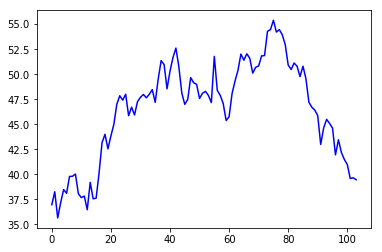

In [63]:
plt.plot(valid_array,color='b',label='valid-close')

In [66]:
inputs_array = close_array[4778-timesteps:4882,3]
inputs_array.shape


(134,)

In [67]:
inputs_array[0]

45.05

In [76]:
valid_scale_wdc= sc_wdc.transform(inputs_array.reshape(-1, 1))
valid_scale_wdc.shape

(134, 1)

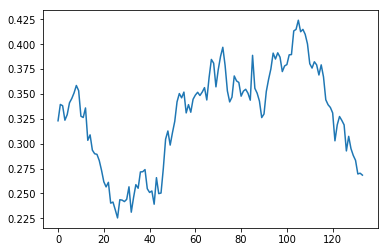

In [77]:
plt.plot(valid_scale_wdc)

In [0]:
X_test = []
for i in range(timesteps, timesteps+40):
    X_test.append(scaled_validation_set[i-timesteps:i,0])
X_test = np.array(X_test)
X_test.shape

(40, 120)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(40, 120, 1)

In [0]:
X_train.shape

(4407, 120, 1)

In [0]:
scaled_preds = []
prices = []
for reg_model in reg_models:
  scaled_preds.append(reg_model.predict(X_test))
  prices.append(sc1.inverse_transform(reg_model.predict(X_test)))



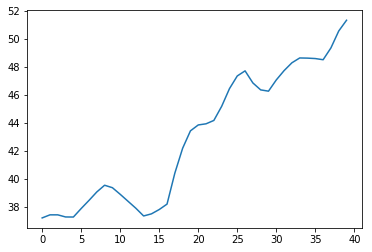

In [0]:
plt.plot(prices[0])

Text(0.5, 1.0, 'WDC Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'WDC Stock Price')

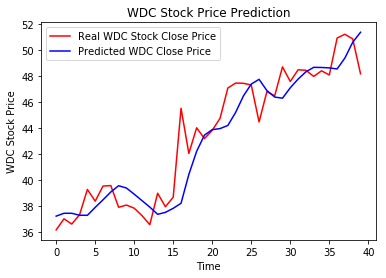

In [0]:
# Visualising the results
plt.plot(valid_array[:,0], color = 'red', label = 'Real WDC Stock Close Price')
plt.plot(prices[0], color = 'blue', label = 'Predicted WDC Close Price')
plt.title('WDC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('WDC Stock Price')
plt.legend()
plt.show()

In [0]:
reg_model.save('reg_model.hdf5')